**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_1_)    
- [Regression to the mean](#toc2_)    
  - [Loading the Dataset](#toc2_1_)    
  - [Visual exploration of the claim](#toc2_2_)    
  - [Modeling consecutive returns](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import Statements](#toc0_)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statsmodels.formula.api as smf

## <a id='toc2_'></a>[Regression to the mean](#toc0_)

Regression to the mean is a statistical phenomenon that describes how variables much higher or lower than the mean are often much closer to the mean when measured a second time. This is because extreme values are often due to chance variation, and chance variation is less likely to occur twice in a row.

### <a id='toc2_1_'></a>[Loading the Dataset](#toc0_)

Regression to the mean is also an important concept in investing. Here we'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The *sp500_yearly_returns* dataset contains three columns:
- symbol: Stock ticker symbol uniquely identifying the company.
- return_2018: A measure of investment performance in 2018.
- return_2019: A measure of investment performance in 2019.

A positive number for the return means the investment increased in value; negative means it lost value.

In [4]:
sp500_yearly_returns = pd.read_csv("./datasets/sp500_yearly_returns.csv")

In [5]:
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762



A naive prediction might be that the investment performance stays the same from year to year, lying on the $y = x$ line i.e, the growth rate or the rate of decline is constant through the years. Let's examine that assumption.

### <a id='toc2_2_'></a>[Visual exploration of the claim](#toc0_)

If the naive assumption is to be proven correct then the data points on a scatter plot of the two years' returns should lie on the $y = x$ line.

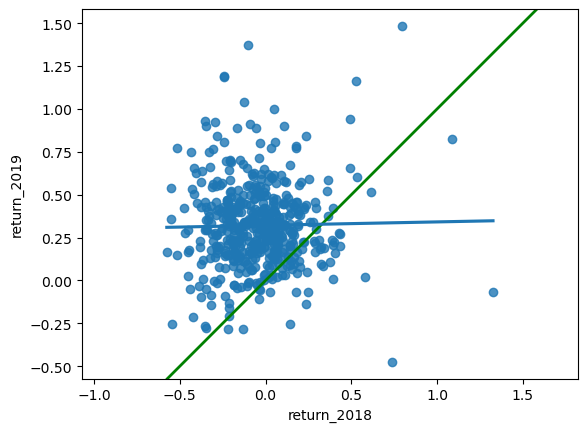

In [6]:
# Create a new figure and an axes to plot the visuals on
fig, ax = plt.subplots()

# the first layer: y = x
ax.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# scatter plot with linear regression trend line
sns.regplot(data=sp500_yearly_returns, x="return_2018", y="return_2019", ci=None, ax=ax)

# set the axes so that the distances along the x and y axes look the same
ax.axis("equal")

# show the plot
plt.show()

From the above regression plot it is clear that the trend of return on investment is not correctly represented by the $x=y$ line. On the contrary, the actual trend line (represented as a blue line) varies widely from the $x=y$ line (represented as a green line).

### <a id='toc2_3_'></a>[Modeling consecutive returns](#toc0_)

Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions.

In [7]:
# fitted model
mdl_returns = smf.ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

In [8]:
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [9]:
# By looking at companies with extremely high or extremely low returns in 2018, 
# we can see if their performance was similar in 2019.

# creating a DataFrame with return_2018 at -1, 0, and 1 (to be used for prediction)
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.